<a href="https://colab.research.google.com/github/lavanya861059/IAV/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving natR.csv to natR.csv


In [3]:
import pandas as pd

# Try reading the CSV file with a different encoding, like 'latin-1'
# If 'latin-1' doesn't work, you might need to try other encodings
# such as 'ISO-8859-1', 'cp1252', etc.
try:
    df = pd.read_csv("natR.csv", encoding='latin-1')
except UnicodeDecodeError:
    # If 'latin-1' fails, you can try another common encoding or
    # investigate the file's actual encoding.
    print("Could not decode with latin-1. Trying another encoding or investigate the file.")
    # Example of trying another encoding:
    # try:
    #     df = pd.read_csv("natR.csv", encoding='cp1252')
    # except UnicodeDecodeError:
    #     print("Could not decode with cp1252 either.")


df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [4]:
df.info()
df.describe()
df['label'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9900 non-null   object
 1   label   9900 non-null   object
dtypes: object(2)
memory usage: 154.8+ KB


,count
label,
Fake,5000
Real,4900


In [5]:
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()


Missing values:
 Text     0
label    0
dtype: int64
Duplicate rows: 35


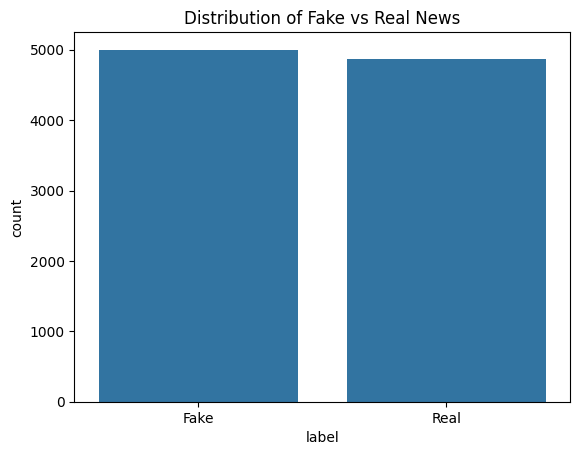

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Distribution of Fake vs Real News")
plt.show()


In [11]:
X = df['Text']
y = df['label']


In [12]:
# Convert 'label' to numerical: Fake = 0, Real = 1
df['label'] = df['label'].map({'Fake': 0, 'Real': 1})
y = df['label']


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

# Text vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Classifier
model = PassiveAggressiveClassifier()
model.fit(X_train_vec, y_train)


PassiveAggressiveClassifier()

In [15]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9994931576279777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       977
           1       1.00      1.00      1.00       996

    accuracy                           1.00      1973
   macro avg       1.00      1.00      1.00      1973
weighted avg       1.00      1.00      1.00      1973



In [16]:
sample_news = ["The government passed a new healthcare reform bill."]
sample_vec = vectorizer.transform(sample_news)
pred = model.predict(sample_vec)
print("Prediction:", "Real" if pred[0] == 1 else "Fake")


Prediction: Real


In [18]:
!pip install gradio


In [22]:
def predict_news(text):
    vector = vectorizer.transform([text])
    result = model.predict(vector)[0]
    return "Real News 📰" if result == 1 else "Fake News ⚠️"


In [23]:
import gradio as gr

interface = gr.Interface(fn=predict_news,
                         inputs="text",
                         outputs="text",
                         title="🕵️‍♂️ Fake News Detector",
                         description="Enter a news headline or article to check if it's Real or Fake.")
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8197dcb2028a65eb1f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
